In [1]:
%matplotlib notebook
import matplotlib.pylab as plt


Here we import all our helper functions

In [2]:
from main import *



## import raw data

In [3]:
n = 50
fn = "data/randomSampleSta10.csv"

In [4]:
x, y, z = importCsv(fn)

## convert from cartesian to spherical coordinates

In [5]:
r, az, el = cart2sph(x, y, z)

min/max lats (radians) -1.427986415093525 -0.015847818784296374
lngs range (radians) -1.57079632679 1.57079632679
min/max lngs (radians) 2.0861676844429624 4.1972234265367
lats range (radians) 0 6.28318530718


## this makes the job of smoothing easier
since all points are unique in this space

In [6]:
azLoc, elLoc, rSmooth = smooth(az, el, r, n)

J: 0
J: 1
J: 2
J: 3
J: 4
J: 5
J: 6
J: 7
J: 8
J: 9
J: 10
J: 11
J: 12
J: 13
J: 14
J: 15
J: 16
J: 17
J: 18
J: 19
J: 20
J: 21
J: 22
J: 23
J: 24
J: 25
J: 26
J: 27
J: 28
J: 29
J: 30
J: 31
J: 32
J: 33
J: 34
J: 35
J: 36
J: 37
J: 38
J: 39
J: 40
J: 41
J: 42
J: 43
J: 44
J: 45
J: 46
J: 47
J: 48
J: 49
[########################################] | 100% Completed |  1min 30.5s
[########################################] | 100% Completed |  0.1s


Exception RuntimeError: RuntimeError('cannot join current thread',) in <Finalize object, dead> ignored


## visualize smoothed surface
this is what our dish looks like in spherical coords, smoothed out
from the original data in cartesian

In [7]:
from mpl_toolkits.mplot3d import axes3d, Axes3D

<IPython.core.display.Javascript object>


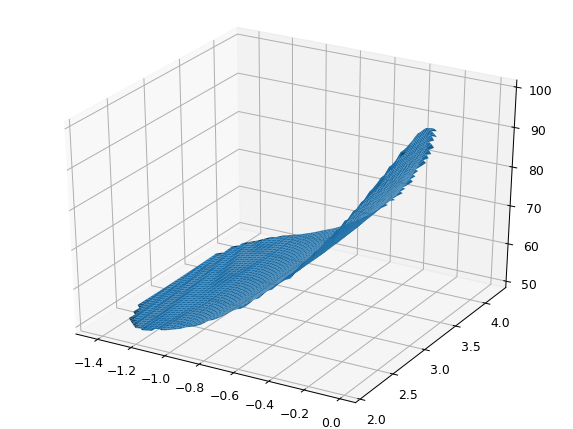

In [13]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(azLoc, elLoc, rSmooth)

## put our smoothed surface back to XYZ

In [11]:
xs, ys, zs = sph2cart(azLoc, elLoc, rSmooth)

min/max az (radians) -1.427986415093525 -0.015847818784296374
el range (radians) -1.57079632679 1.57079632679
min/max el (radians) 2.0861676844429624 4.1972234265367
az range (radians) 0 6.28318530718


In [12]:
ax.plot_surface(xs, ys, zs)

<IPython.core.display.Javascript object>


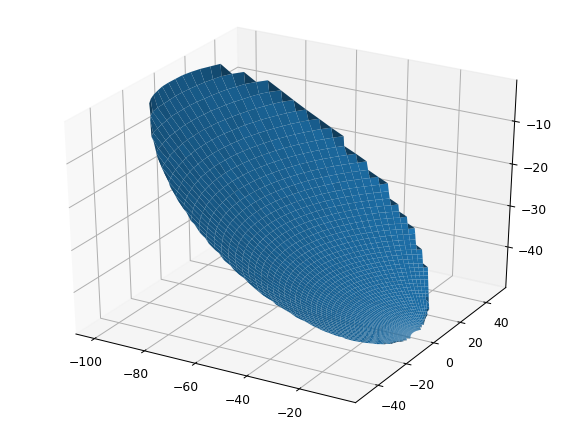

In [14]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(xs, ys, zs)

## but look how it's not evenly spaced!

<IPython.core.display.Javascript object>


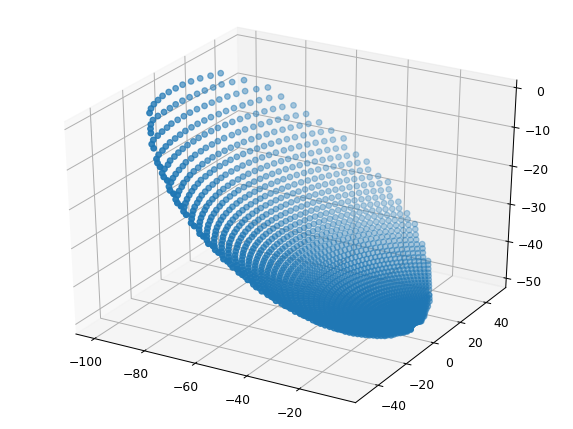

In [15]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(xs, ys, zs)

## which we think screws up our attempt at fitting zernikes to this surface
we don't think this really describes our surface very well.

<IPython.core.display.Javascript object>


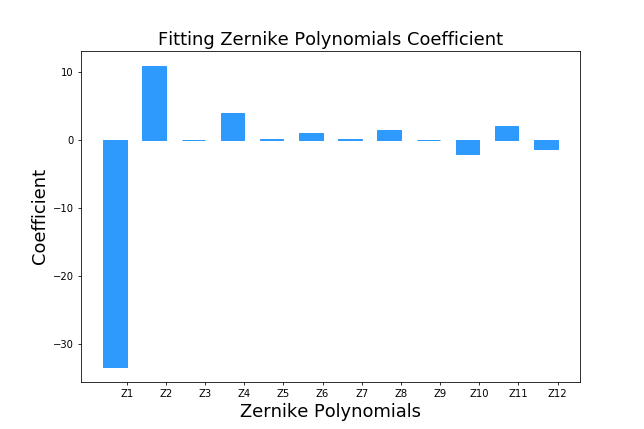

<IPython.core.display.Javascript object>


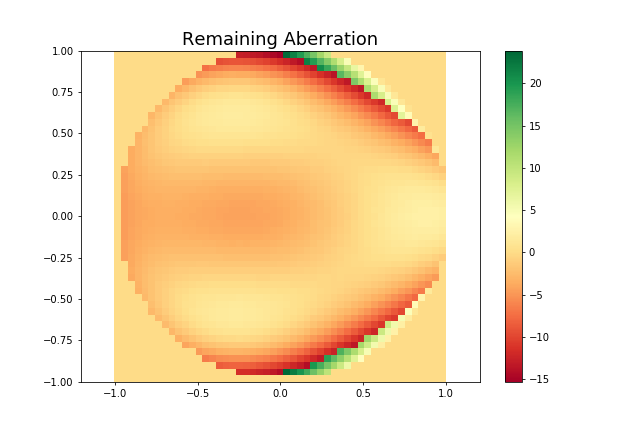

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 |10.871 |-0.059 | 3.991 | 0.143 | 1.039 | 0.157 | 1.463 | 0.009 |-2.043 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
| 2.043 |-1.394 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.000 |

<IPython.core.display.Javascript object>


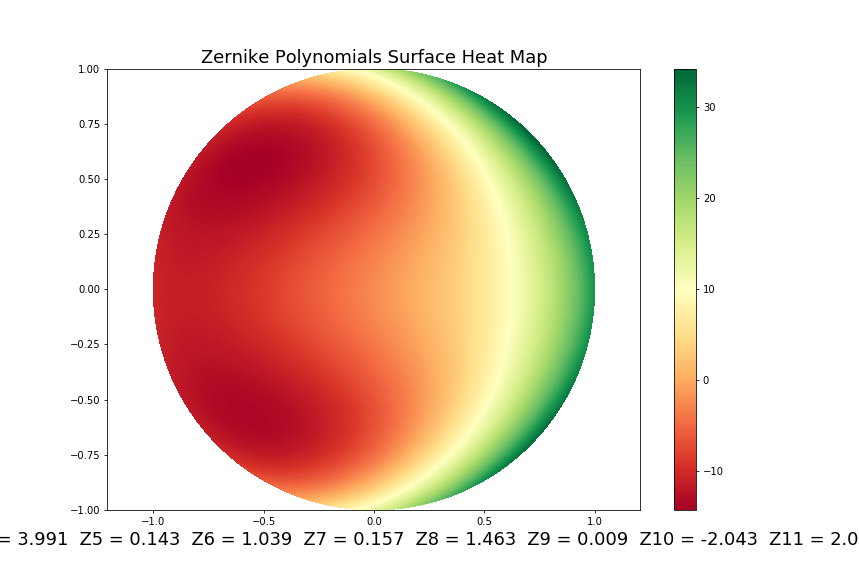

Z2 =  10.871 Z11 x Tilt
Z3 =  -0.059 Z11 y Tilt
Z4 =  3.991 Z20 Defocus
Z5 =  0.143 Z22 Primary Astigmatism at 45
Z6 =  1.039 Z22 Primary Astigmatism at 0
Z7 =  0.157 Z31 Primary y Coma
Z8 =  1.463 Z31 Primary x Coma
Z9 =  0.009 Z33 y Trefoil
Z10 =  -2.043 Z33 x Trefoil
Z11 =  2.043 Z40 Primary Spherical
Z12 =  -1.394 Z42 Secondary Astigmatism at 0


In [28]:
zs[np.isnan(zs)] = 0.
zfits, c = zernikeFit(zs)

## so let's try to make it evenly sampled

In [20]:
xss, yss, zss = smoothXYZ(xs, ys, zs, n, sigX=0.5, sigY=0.5)

xLoc [[-100.62145856  -98.687909    -96.75435944 ...   -9.74462921
    -7.81107965   -5.87753009]
 [-100.62145856  -98.687909    -96.75435944 ...   -9.74462921
    -7.81107965   -5.87753009]
 [-100.62145856  -98.687909    -96.75435944 ...   -9.74462921
    -7.81107965   -5.87753009]
 ...
 [-100.62145856  -98.687909    -96.75435944 ...   -9.74462921
    -7.81107965   -5.87753009]
 [-100.62145856  -98.687909    -96.75435944 ...   -9.74462921
    -7.81107965   -5.87753009]
 [-100.62145856  -98.687909    -96.75435944 ...   -9.74462921
    -7.81107965   -5.87753009]]
yLoc [[-48.55702738 -48.55702738 -48.55702738 ... -48.55702738 -48.55702738
  -48.55702738]
 [-46.57785202 -46.57785202 -46.57785202 ... -46.57785202 -46.57785202
  -46.57785202]
 [-44.59867666 -44.59867666 -44.59867666 ... -44.59867666 -44.59867666
  -44.59867666]
 ...
 [ 44.46421453  44.46421453  44.46421453 ...  44.46421453  44.46421453
   44.46421453]
 [ 46.44338989  46.44338989  46.44338989 ...  46.44338989  46.44338989
  

## Ugh.  Doesn't work
We've converted our nice dish to some kind of freakish ramp looking thing.

<IPython.core.display.Javascript object>


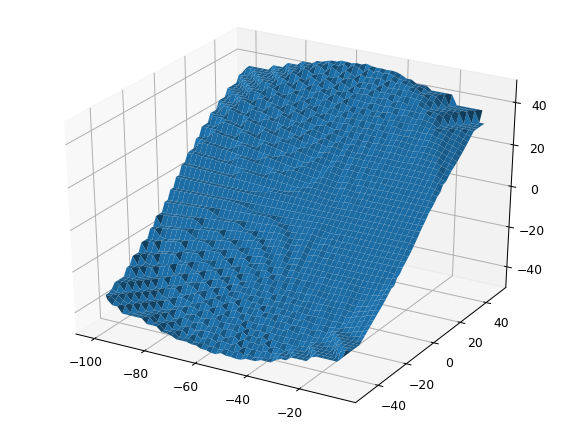

In [21]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(xss, yss, zss)

<IPython.core.display.Javascript object>


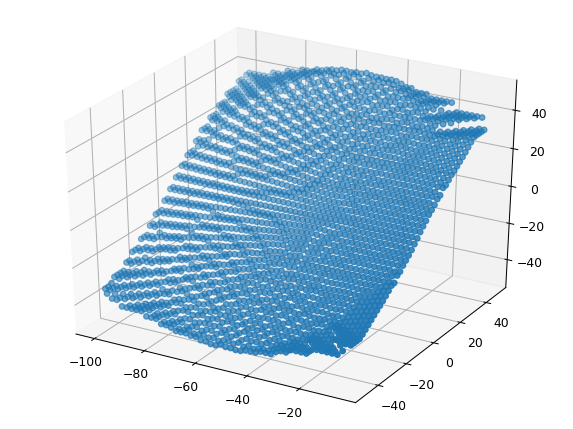

In [22]:
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(xss, yss, zss)

## But we can fit zernikes to it!
The coefficients we get actually describe a ramp pretty well ..

<IPython.core.display.Javascript object>


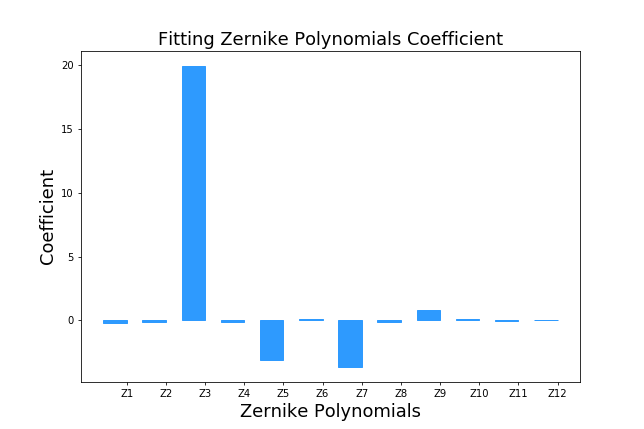

<IPython.core.display.Javascript object>


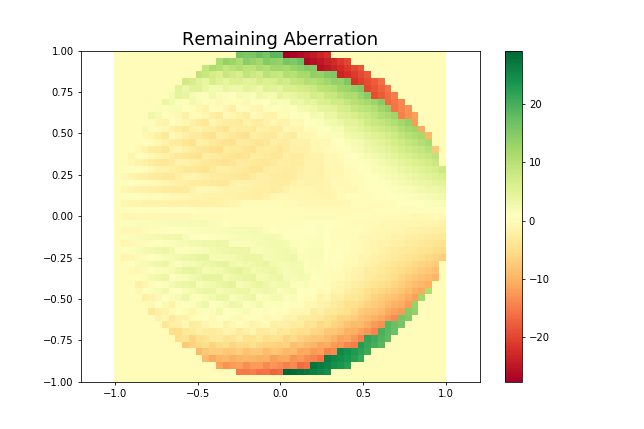

                            Zernike Polynomials List                              
----------------------------------------------------------------------------------
|   Z1  |   Z2  |   Z3  |   Z4  |   Z5  |   Z6  |   Z7  |   Z8  |   Z9  |  Z10  |
----------------------------------------------------------------------------------
| 0.000 |-0.111 |19.940 |-0.144 |-3.073 | 0.091 |-3.620 |-0.087 | 0.799 | 0.147 |
----------------------------------------------------------------------------------
|  Z11  |  Z12  |  Z13  |  Z14  |  Z15  |  Z16  |  Z17  |  Z18  |  Z19  |  Z20  |
----------------------------------------------------------------------------------
|-0.066 | 0.020 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 | 0.000 |
----------------------------------------------------------------------------------
|  Z21  |  Z22  |  Z23  |  Z24  |  Z25  |  Z26  |  Z27  |  Z28  |  Z29  |  Z30  |
----------------------------------------------------------------------------------
| 0.000 |

<IPython.core.display.Javascript object>


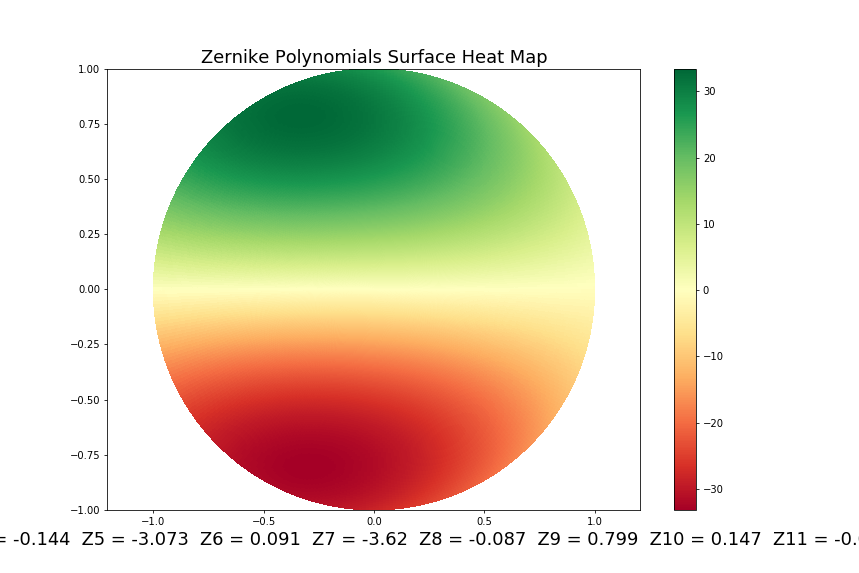

Z2 =  -0.111 Z11 x Tilt
Z3 =  19.94 Z11 y Tilt
Z4 =  -0.144 Z20 Defocus
Z5 =  -3.073 Z22 Primary Astigmatism at 45
Z6 =  0.091 Z22 Primary Astigmatism at 0
Z7 =  -3.62 Z31 Primary y Coma
Z8 =  -0.087 Z31 Primary x Coma
Z9 =  0.799 Z33 y Trefoil
Z10 =  0.147 Z33 x Trefoil
Z11 =  -0.066 Z40 Primary Spherical
Z12 =  0.02 Z42 Secondary Astigmatism at 0


In [23]:
zss[np.isnan(zs)] = 0.
zfits, c = zernikeFit(zss)

In [24]:
zfits

[0,
 0,
 -0.111,
 19.94,
 -0.144,
 -3.073,
 0.091,
 -3.62,
 -0.087,
 0.799,
 0.147,
 -0.066,
 0.02,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [25]:
c

In [26]:
print c

In [27]:
c.listcoefficient()

Z2 =  -0.111 Z11 x Tilt
Z3 =  19.94 Z11 y Tilt
Z4 =  -0.144 Z20 Defocus
Z5 =  -3.073 Z22 Primary Astigmatism at 45
Z6 =  0.091 Z22 Primary Astigmatism at 0
Z7 =  -3.62 Z31 Primary y Coma
Z8 =  -0.087 Z31 Primary x Coma
Z9 =  0.799 Z33 y Trefoil
Z10 =  0.147 Z33 x Trefoil
Z11 =  -0.066 Z40 Primary Spherical
Z12 =  0.02 Z42 Secondary Astigmatism at 0


['Z2 = -0.111\nZ3 = 19.94\nZ4 = -0.144\nZ5 = -3.073\nZ6 = 0.091\nZ7 = -3.62\nZ8 = -0.087\nZ9 = 0.799\nZ10 = 0.147\nZ11 = -0.066\nZ12 = 0.02\n',
 'Z2 = -0.111  Z3 = 19.94  Z4 = -0.144  Z5 = -3.073  Z6 = 0.091  Z7 = -3.62  Z8 = -0.087  Z9 = 0.799  Z10 = 0.147  Z11 = -0.066  Z12 = 0.02  ']